In [1]:
import pandas as pd
import numpy as np
from copy import deepcopy
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt

train_path = 'data/rating.csv'

product = pd.read_csv('data/products.csv')
product.rename(columns={
    'id': 'product_id'
}, inplace=True)

df = pd.read_csv(train_path,)
df = pd.merge(df, product, on='product_id', how='inner')
# df
utility = df.pivot(index = 'name', columns = 'user_id', values = 'rating')
utility = utility.fillna(0)
utility



user_id,1,2,3,4,5,6,7,8,9,10,...,110,111,112,113,114,115,116,117,118,119
name,,,,,,,,,,,,,,,,,,,,,
CPU Rizen,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.5,0.0,5.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0
Desain Banner,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
Desain Event Stage,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0,...,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Desain Identitas Perusahaan (Corporate Identity Design),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,4.0,4.5,3.5,0.0,5.0,0.0,0.0,0.0,0.0,0.0
Desain Iklan (Advertising Design),0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Desain Ilustrasi (Illustration Design),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0
Desain Logo,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,4.0,0.0,0.0,3.5,0.0,0.0,0.0,5.0
Desain Motion Graphics.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0
Desain Paket (Packaging Design),0.0,2.5,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
product.head()

,product_id,name,description,image,price,weigth,categories_id,created_at,updated_at,stok
0,1,Sistem Keuangan,-,imageproduct/ayeuVUSTTyRKGTH0FHlz1nE1WrNBBLq8W...,15000000,0,1,2023-10-02 04:58:19,2023-10-02 04:58:19,100
1,2,Sistem Penjaminan Mutu,-,imageproduct/Qbn54KgkBPtnDr0ASoTmFaKf5We7orwlj...,10000000,0,1,2023-10-02 04:58:49,2023-10-02 04:58:49,100
2,3,Digital Librari,-,imageproduct/oycPzvgAOyoMStS8NMxHvLPy6kr8WfGjB...,7000000,0,1,2023-10-02 05:15:08,2023-10-02 05:15:08,1000
3,4,E-Fakultas,-,imageproduct/9flpnfbFmGqD9R2WIX7Lp2FvK7wPWD48X...,50000000,0,1,2023-10-02 05:51:37,2023-10-02 05:51:37,0
4,5,Motherboard,-,imageproduct/P5h1UgS9MVMhPMbAyle5saT5vzyCzP6df...,2000000,1000,2,2023-10-14 07:09:38,2023-10-14 07:09:38,100


In [3]:
# filter = product['name'] == "VGA Full"
ft = product.loc[product['product_id'] == 2]['image'].values


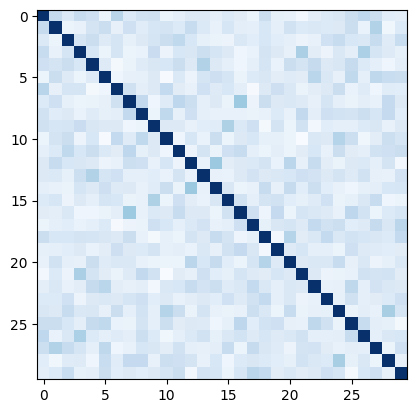

In [4]:
# similarity = 1- distance
distance_mtx = squareform(pdist(utility, 'cosine'))
similarity_mtx = 1- distance_mtx

item_similarity = utility.T.corr()
similarity_mtx = item_similarity.to_numpy()

plt.imshow(similarity_mtx, cmap = 'Blues')

In [5]:
item_similarity

name,CPU Rizen,Desain Banner,Desain Event Stage,Desain Identitas Perusahaan (Corporate Identity Design),Desain Iklan (Advertising Design),Desain Ilustrasi (Illustration Design),Desain Logo,Desain Motion Graphics.,Desain Paket (Packaging Design),Desain Tipografi (Typography Design),...,RAM Kingstons HyperrX,SSD Samsung,Sistem Akademik,Sistem Keuangan,Sistem Pendaftaran Mahasiswa,Sistem Penjaminan Mutu,Sistem Recomendasi,V Series SSD,VGA Full,Website dan UI/UX
name,,,,,,,,,,,,,,,,,,,,,
CPU Rizen,1.000000,0.096181,-0.029406,0.094165,0.056046,-0.131702,0.151440,-0.035416,0.029722,0.041867,...,-0.109432,-0.160514,-0.077536,-0.032888,-0.015459,0.071505,0.123148,0.064229,-0.064540,-0.074130
Desain Banner,0.096181,1.000000,-0.133423,-0.103162,0.014172,0.074524,-0.098317,0.048512,-0.058591,-0.002775,...,0.030171,-0.033216,-0.021763,-0.031762,-0.044362,0.073100,-0.110615,0.178707,-0.150143,-0.031316
Desain Event Stage,-0.029406,-0.133423,1.000000,0.010587,0.068803,-0.049117,0.007892,-0.095936,-0.037766,0.003513,...,-0.083996,-0.128725,-0.108659,0.047269,0.087646,-0.009128,-0.019434,0.090572,-0.053805,0.081754
Desain Identitas Perusahaan (Corporate Identity Design),0.094165,-0.103162,0.010587,1.000000,-0.011098,-0.132507,0.010786,-0.120358,-0.113491,0.080067,...,-0.098129,0.205605,-0.071059,-0.126212,-0.017720,-0.080505,0.202130,0.010140,-0.046851,-0.094726
Desain Iklan (Advertising Design),0.056046,0.014172,0.068803,-0.011098,1.000000,-0.046240,-0.171157,-0.119730,-0.051331,-0.014741,...,0.071634,0.018828,0.095676,-0.042625,-0.014734,0.097003,-0.034665,-0.082997,-0.144856,-0.073538
Desain Ilustrasi (Illustration Design),-0.131702,0.074524,-0.049117,-0.132507,-0.046240,1.000000,-0.140435,-0.098239,-0.092634,-0.039734,...,-0.053946,-0.062370,0.146396,-0.021017,-0.098167,0.120748,-0.087564,0.131451,0.084098,0.070524
Desain Logo,0.151440,-0.098317,0.007892,0.010786,-0.171157,-0.140435,1.000000,0.041102,-0.077934,-0.040865,...,-0.018631,-0.118557,-0.068708,-0.045035,0.074578,-0.111287,-0.052986,-0.146797,-0.057035,-0.068151
Desain Motion Graphics.,-0.035416,0.048512,-0.095936,-0.120358,-0.119730,-0.098239,0.041102,1.000000,0.117141,-0.139998,...,-0.025159,-0.045928,-0.101066,0.003255,-0.089167,-0.119654,-0.079536,-0.102689,0.108636,-0.042000
Desain Paket (Packaging Design),0.029722,-0.058591,-0.037766,-0.113491,-0.051331,-0.092634,-0.077934,0.117141,1.000000,-0.132010,...,-0.104343,0.114611,-0.077126,0.053987,0.027870,0.014893,0.062306,-0.004784,0.106134,-0.067446


In [9]:
# Let's predict the rating of user2 on item 3
user_to_predict = 1
item_to_predict = 2

user2_ratings = utility.iloc[:,user_to_predict-1]
item3_similarity = similarity_mtx[item_to_predict-1]

numerator = np.dot(user2_ratings,item3_similarity)
denom = item3_similarity[user2_ratings > 0].sum()
prediction = numerator / denom
print(prediction)

4.3255287604472645


In [68]:
def calculate_user_rating(userid, similarity_mtx, utility):
    user_rating = utility.iloc[:,userid-1]
    pred_rating = deepcopy(user_rating)
    
    default_rating = user_rating[user_rating>0].mean()
    numerate = np.dot(similarity_mtx, user_rating)
    corr_sim = similarity_mtx[:, user_rating >0]
    for i,ix in enumerate(pred_rating):
        temp = 0
        if ix < 1:
            w_r = numerate[i]
            sum_w = corr_sim[i,:].sum()
            if w_r == 0 or sum_w == 0:
                temp = default_rating
            else:
                temp = w_r / sum_w
            pred_rating.iloc[i] = temp
    return pred_rating


def recommendation_to_user(userid, top_n, similarity_mtx, utility):
    user_rating = utility.iloc[:,userid-1]
    pred_rating = calculate_user_rating(userid, similarity_mtx, utility)

    top_item = sorted(range(1,len(pred_rating)), key = lambda i: -1*pred_rating.iloc[i])
    top_item = list(filter(lambda x: user_rating.iloc[x]==0, top_item))[:top_n]
    res = []
    for i in top_item:
        res.append(tuple([i, pred_rating.iloc[i]]))
    
    return res

recommendation_to_user(2,20,similarity_mtx, utility)

[(2, 21.15385270384964),
 (28, 12.486723278568599),
 (25, 8.025335120348839),
 (14, 7.0195557157796244),
 (12, 5.261338313448606),
 (17, 4.5433318282044075),
 (24, 4.101285631463202),
 (5, 4.034141777119058),
 (4, 3.971648276115695),
 (27, 3.0974947005877866),
 (21, 3.0335734640482337),
 (13, 2.951707199610388),
 (15, 2.758381072519709),
 (20, 2.741385023285318),
 (1, 2.7045673441111004),
 (16, 2.647461466549131),
 (3, 2.6181834052496313),
 (11, 2.576634586413939),
 (26, 2.406352691152414),
 (19, 2.2431722552364994)]

In [16]:
import pickle
!mkdir artifacts
pickle.dump(recommendation_to_user, open('artifacts/model.pkl', 'wb'))
pickle.dump(similarity_mtx, open('artifacts/matrix.pkl', 'wb'))
pickle.dump(utility, open('artifacts/utility.pkl', 'wb'))




mkdir: artifacts: File exists
